# Ejercicios

Los embeddings son particulares de cada idioma por lo que la representación de palabras en inglés no nos sirve cuando estamos trabajando en español. Existen [modelos preentrenados para nuestro idioma](https://github.com/dccuchile/spanish-word-embeddings).

Debemos descargar el fichero de los pesos y cargarlo. Seguidamente podremos usarlo como hemos visto anteriormente. Por ejemplo vamos a cargar un modelo FastText.

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.vec -O wiki.es.vec

--2024-01-16 09:46:58--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.128, 18.164.78.121, 18.164.78.81, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2594302560 (2.4G) [binary/octet-stream]
Saving to: ‘wiki.es.vec’

wiki.es.vec         100%[===================>]   2.42G   132MB/s    in 19s     

2024-01-16 09:47:17 (131 MB/s) - ‘wiki.es.vec’ saved [2594302560/2594302560]



A continuación mostramos las primeras filas del modelo, como se puede ver el documento que acabamos de descargar contiene en cada línea un n-grama y a continuación su representación en forma de vector.

In [ ]:
!head wiki.es.vec

985667 300
de -0.13075 -0.087659 -0.11427 -0.020641 0.11753 0.19687 0.054257 -0.0028717 0.062278 -0.10023 -0.050123 -0.026275 -0.057605 -0.13072 0.10147 0.15849 0.095493 0.051555 0.015874 -0.046374 0.098467 0.034867 0.039933 -0.1208 0.065478 -0.0098815 -0.13914 -0.043732 -0.015622 0.05665 -0.01476 -0.0054753 -0.047127 -0.21595 -0.015154 -0.0034798 0.058253 0.036444 -0.25157 0.060459 0.23842 0.017983 0.10673 -0.15889 0.23043 -0.078636 0.075394 -0.18431 -0.31417 0.084773 -0.14912 0.036904 -0.1144 0.025056 0.058607 0.059822 -0.17929 0.028468 0.16728 -0.020946 0.019714 0.0083937 0.032227 0.013204 0.06393 -0.19616 -0.043487 0.10124 -0.032762 0.17206 -0.062339 -0.10172 -0.31708 0.079012 -0.1232 -0.15504 -0.084187 -0.099777 0.16626 0.086791 0.001035 0.10478 0.12913 -0.0026416 0.061668 0.10004 -0.073838 0.167 0.10342 -0.05263 0.20125 0.23046 0.043589 0.19497 -0.0093385 -0.042631 -0.17599 -0.15208 0.23261 -0.10049 0.096678 -0.030501 0.060627 -0.27119 -0.11177 0.26739 0.205 -0.13012 0.051966 0.1

La carga del modelo es un poco distinta a lo visto anteriormente. En concreto debemos usar el siguiente código (notar que no cargamos todo el documento sino solo los 100000 primeros n-gramas).

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'wiki.es.vec'
cantidad = 100000
wvFastTextSpanish = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

Ahora podemos utilizar las mismas funciones vistas anteriormente.

**Ejercicio:** Encuentra las 5 palabras más similares a bicicleta.

In [ ]:
print(wvFastTextSpanish.most_similar(positive=['bicicleta'], topn=5))

[('bicicletas', 0.8180868029594421), ('bici', 0.7310569882392883), ('motocicleta', 0.6779677867889404), ('bike', 0.6354870796203613), ('moto', 0.5987208485603333)]


**Ejercicio:** Responde a la siguiente analogía. *Hombre es a actor como mujer es a...*

In [ ]:
wvFastTextSpanish.most_similar_cosmul(positive=['actor','mujer'],negative=['hombre'])

[('actriz', 1.0298713445663452),
 ('bailarina', 0.9005749821662903),
 ('actrices', 0.9004863500595093),
 ('dramaturga', 0.8913683891296387),
 ('coreógrafa', 0.884644627571106),
 ('locutora', 0.8787723183631897),
 ('presentadora', 0.8759288787841797),
 ('compositora', 0.8649977445602417),
 ('actoral', 0.8637272119522095),
 ('comediante', 0.8625256419181824)]

**Ejercicio:** Responde a la siguiente analogía. *Canta es a cantar como juega es a ...*

In [ ]:
wvFastTextSpanish.most_similar_cosmul(positive=['cantar','juega'],negative=['canta'])

[('jugar', 0.9471045136451721),
 ('jugaba', 0.8722786903381348),
 ('centrocampista', 0.8656566739082336),
 ('jugando', 0.8536456227302551),
 ('mediocampista', 0.8485172986984253),
 ('mediapunta', 0.8384413719177246),
 ('jugó', 0.837324857711792),
 ('jugarse', 0.8344488739967346),
 ('juegue', 0.8287683129310608),
 ('jugara', 0.827880859375)]

**Ejercicio:** Responde a la siguiente analogía. *Madrid es a España como Lisboa es a ...*

In [ ]:
wvFastTextSpanish.most_similar_cosmul(positive=['españa','lisboa'],negative=['madrid'])

[('portugal', 0.9711438417434692),
 ('algarve', 0.8720709681510925),
 ('estêvão', 0.8418089747428894),
 ('portuguesas', 0.8351492285728455),
 ('portuguesa', 0.8348496556282043),
 ('alentejo', 0.8336402177810669),
 ('portimão', 0.8250820636749268),
 ('portugues', 0.8246365189552307),
 ('portugueses', 0.8224292993545532),
 ('brasil', 0.8218298554420471)]

**Ejercicio:** Encuentra la palabra que no encaja en la lista ``[lunes, martes, septiembre, jueves, viernes]``

In [ ]:
wvFastTextSpanish.doesnt_match(['lunes','martes','septiembre','jueves','viernes'])

'septiembre'

**Ejercicio:** Utiliza el código visto en el notebook de explicación para visualizar la relación entre las primeras 300 palabras del modelo.

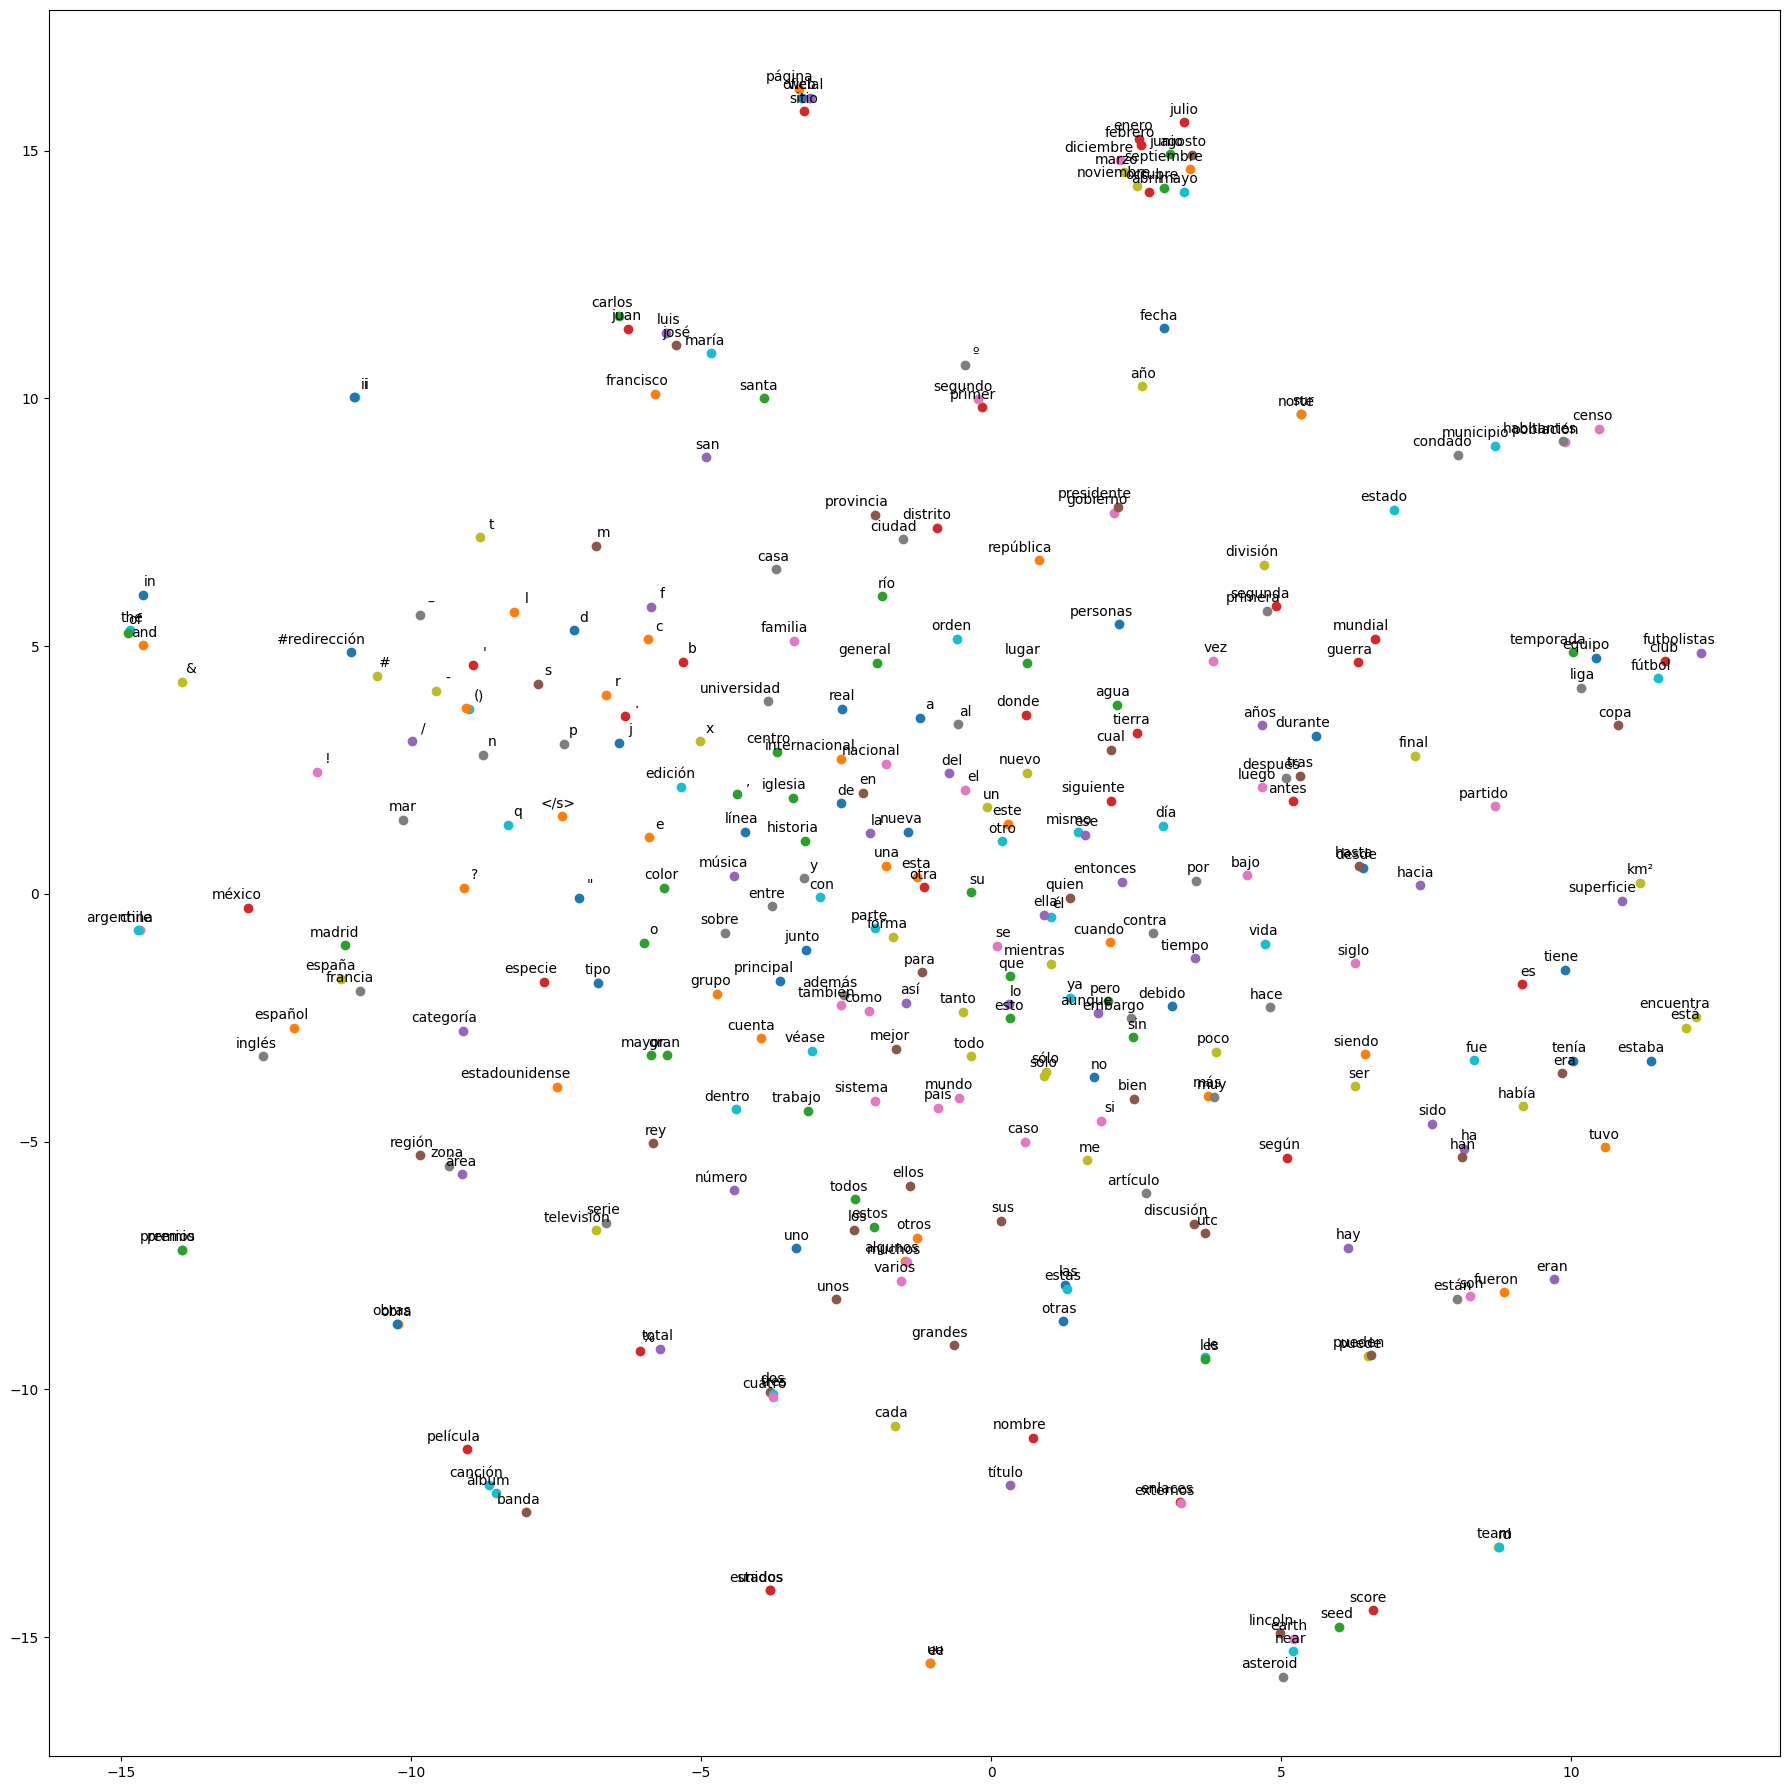

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

rcParams.update({'figure.autolayout': True})
%matplotlib inline

# Limita el número de palabras a mostrar
limit = 300
vector_dim = 300

# Se obtienen las palabras y vectores asociados
words = []
embedding = np.array([])
i = 0
for word in wvFastTextSpanish.key_to_index.keys():
    if i == limit: break

    # Se agrupan las palabras
    words.append(word)

    # Se almacenan los vectores asociados a cada palabra
    embedding = np.append(embedding, wvFastTextSpanish[word])

    i+=1

# Se transforma el vector en un formato adecuado
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Se aplica un proceso de reducción de la dimensionalidad
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
low_dim_embedding = tsne.fit_transform(embedding)

# Finalmente se muestra la figura
plot_with_labels(low_dim_embedding, words)

**Ejercicio:** Descarga alguno de los otros modelos proporcionados en el [zoo de modelos](https://github.com/dccuchile/spanish-word-embeddings) y encuentra un ejemplo de analogía y otro de palabra que no encaje usando dicho modelo.

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'embeddings-xs-model.vec'
cantidad = 100000
wvFastTextSUC = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [ ]:
wvFastTextSUC.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre'])

[('desafuero', 1.03448486328125),
 ('desconoció', 1.034346342086792),
 ('renunciaba', 1.0309712886810303),
 ('regencia', 1.030247688293457),
 ('bucaram', 1.0296401977539062),
 ('reconociese', 1.0276319980621338),
 ('destitución', 1.0259950160980225),
 ('protestó', 1.0255296230316162),
 ('abdicación', 1.0255093574523926),
 ('destituyó', 1.0251362323760986)]

In [ ]:
wvFastTextSUC.doesnt_match(['lunes','martes','septiembre','jueves','viernes'])

'septiembre'